downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Administrator\scikit_learn_data
Extracting the top 6 Eigenfaces - PCA using randomized SVD...
(400, 4096)
Extracting the top 6 Non-negative components - NMF...
(400, 4096)


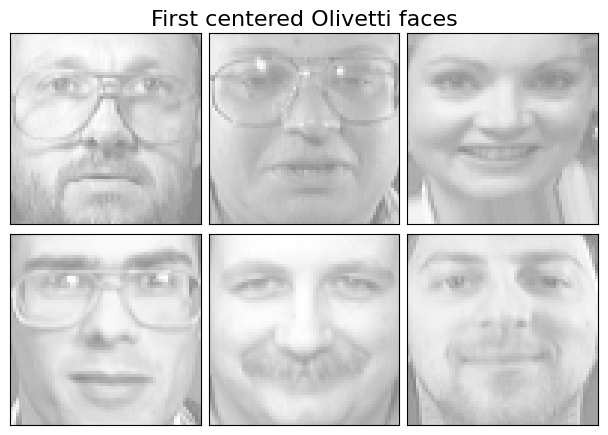

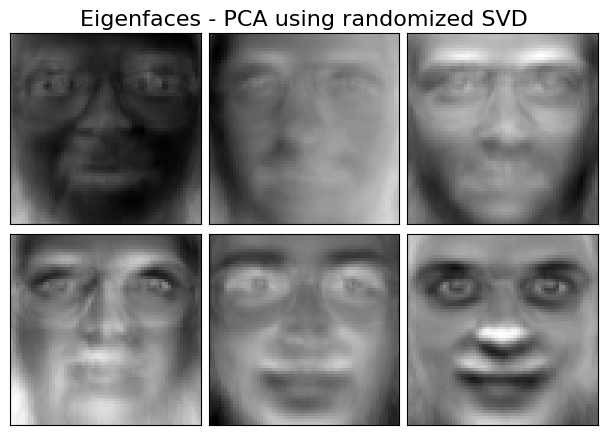

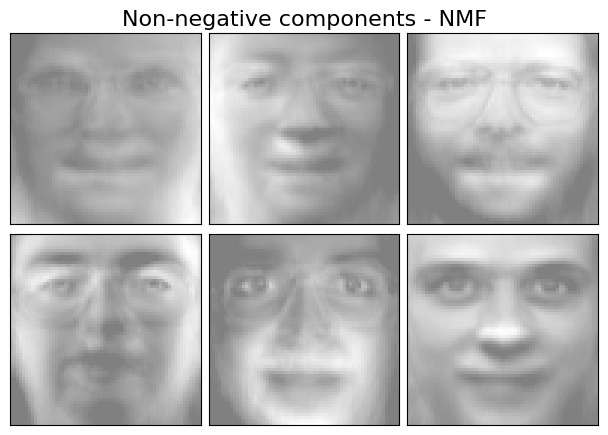

In [1]:
from numpy.random import RandomState
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces   #加载Olivetti人脸数据集导入函数
from sklearn import decomposition

n_row, n_col = 2, 3
n_components = n_row * n_col   #设置提取的特征的数目
image_shape = (64, 64)   #设置展示时人脸数据图片的大小

dataset = fetch_olivetti_faces(shuffle=True, random_state=RandomState(0))
faces = dataset.data

def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)

    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest', vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.94, 0.04, 0.)

plot_gallery("First centered Olivetti faces", faces[:n_components])

estimators = [('Eigenfaces - PCA using randomized SVD', decomposition.PCA(n_components=n_components, whiten=True)),
              ('Non-negative components - NMF', decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3))]

for name, estimator in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    print(faces.shape)
    estimator.fit(faces)   #调用PCA或NMF提取特征
    components_ = estimator.components_   #获取提取的特征
    plot_gallery(name, components_[:n_components])

plt.show()

In [4]:
import numpy as np

a = np.random.randn(6,6)
print(a)

U, S, Vh = np.linalg.svd(a, full_matrices=True)
print(U)
print(S)
print(Vh)

print(np.dot(U, np.dot(np.diag(S), Vh)))
np.allclose(a, np.dot(U, np.dot(np.diag(S), Vh)))

[[-0.36796159  0.4735736  -2.35420687 -0.10937831 -0.5431593  -0.31513367]
 [-1.04022688  2.11477429  1.02347493 -0.01814872 -0.73580714  1.54089357]
 [ 1.00218487  1.25431981 -1.44559672  1.35851326 -1.16749462 -1.55106416]
 [ 1.18773526 -0.11394856 -2.24177008  0.79403429  0.23604473  0.21832717]
 [ 2.02829727 -1.43692669  0.40993682  0.6178598   1.1300767  -1.00275297]
 [ 0.13327453  1.17283424 -2.3605983   0.54364165 -0.3008241  -0.72894181]]
[[ 0.41318635  0.22621107  0.43758952  0.23455521  0.10751423 -0.72114184]
 [-0.24081978  0.62997099 -0.33810683 -0.5362434  -0.15874026 -0.34361418]
 [ 0.53910664  0.08942163 -0.72936959  0.20823639  0.35468502  0.01496488]
 [ 0.45335572 -0.11989197  0.27520456 -0.74363415  0.33533788  0.19726558]
 [ 0.06612718 -0.69610444 -0.29000085 -0.24543144 -0.35662197 -0.48943794]
 [ 0.5203294   0.21221074  0.04879704  0.02891599 -0.77318176  0.2884382 ]]
[5.05130701 4.13989459 2.20586526 1.52601561 0.56037357 0.14961994]
[[ 0.27333398  0.16355921 -0.8

True